## IMDB Scraping

First let's fetch HTML from the [IMDB Top 250](https://www.imdb.com/search/title/?groups=top_250) page:

In [33]:
import requests
from bs4 import BeautifulSoup
import re

In [36]:
re.search(r"\d{4}", "(I) (2015)").group(0)

'2015'

In [28]:
headers = {"Accept-Language": "en-US"}


In [38]:
movies = []
    
for i in range(0, 5):
    start = i * 50 + 1
    print(f"Scraping page {i + 1}")
    url = f"https://www.imdb.com/search/title/?groups=top_250&start={start}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")

    movies_html = soup.find_all(class_="lister-item-content")
    for movie_html in movies_html:
        title = movie_html.find("h3").find("a").text
        duration = int(movie_html.find(class_="runtime").text.strip(' min'))
        year = int(re.search(r"\d{4}", movie_html.find(class_="lister-item-year").text).group(0))
        movie = {
            "title": title,
            "duration": duration,
            "year": year
        }
        movies.append(movie)

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5


In [39]:
len(movies)

250

## Time for EDA

Exploratory Data Analysis

In [41]:
import pandas as pd

In [42]:
movies_df = pd.DataFrame(movies)

In [43]:
movies_df.head()

,title,duration,year
0,Parasite,132,2019
1,1917,119,2019
2,Joker,122,2019
3,Ford v Ferrari,152,2019
4,Avengers: Endgame,181,2019


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111a68210>,
      dtype=object)

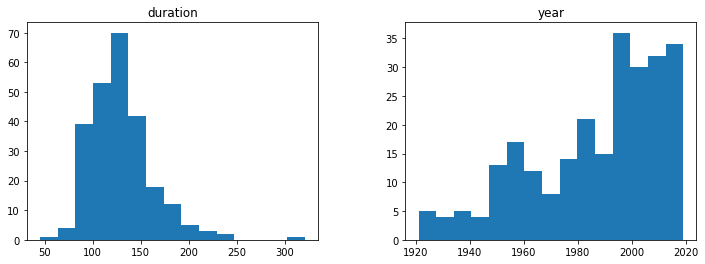

In [44]:
movies_df.hist(grid=False, bins=15, figsize=(12, 4))